#                               DEFI IA: FINAL STEP

## Importation des données

In [1]:
import pandas as pd
import numpy as np
trainDF = pd.read_csv("final-model/newtrain.csv",sep=";")
valDF = pd.read_csv("final-model/newtest.csv",sep=";")
labels = pd.read_csv("final-model/soumission60-fin.csv",sep=";")

In [106]:
test = pd.read_hdf("test.hdf5")

In [2]:
testDF = pd.read_csv("test.csv",sep=",")
testDF.head()

,Unnamed: 0,mean,std,min,25%,50%,75%,max
0,0,0.052278,0.157131,-0.246444,-0.036789,0.012854,0.086433,1.320870
1,1,-0.044933,0.054393,-0.384193,-0.082956,-0.043788,-0.005281,0.157110
2,2,-0.025039,1.439261,-7.058065,-0.952752,-0.020552,0.889994,6.521087
3,3,-0.019569,0.086528,-0.377841,-0.076447,-0.013400,0.052722,0.161022
4,4,-0.014652,0.054767,-0.231434,-0.052648,-0.015027,0.023034,0.205329


In [3]:
testDF = testDF.drop(["Unnamed: 0"],axis=1)
testDF.shape

(1917, 7)

In [4]:
label_from_test = labels.loc[:,"anomaly"]
label_from_test.head()

0    0
1    1
2    0
3    0
4    1
Name: anomaly, dtype: int64

In [5]:
X = valDF
y = label_from_test

In [7]:
tmp = labels[["anomaly"]]
y1 = tmp[tmp["anomaly"]==1]
y0 = tmp[tmp["anomaly"]==0]

In [8]:
xval0 = valDF.iloc[y0.index,:]
xval1 = valDF.iloc[y1.index,:]

## Split du jeu de données

In [29]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=134)

## Construction du modèle

Définition de 10 blocs pour la validation croisée

In [11]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier,BaggingClassifier,VotingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.cross_validation import cross_val_score
from sklearn import metrics
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV

c:\users\soum bartowski\anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
c:\users\soum bartowski\anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## 1. logistic model

In [8]:
logit_model = LogisticRegression()

logit_model = logit_model.fit(x_train, y_train)
logit_model.score(x_train, y_train)

predicted = pd.DataFrame(logit_model.predict(x_test))
# Probabilities on the test dataset
logit_probs = pd.DataFrame(logit_model.predict_proba(x_test))

# Store metrics
logit_accuracy = metrics.accuracy_score(y_test, predicted)
logit_roc_auc = metrics.roc_auc_score(y_test, logit_probs[1])       
logit_confus_matrix = metrics.confusion_matrix(y_test, predicted) 
logit_classification_report = metrics.classification_report(y_test, predicted)
logit_precision = metrics.precision_score(y_test, predicted, pos_label=1)
logit_recall = metrics.recall_score(y_test, predicted, pos_label=1)
logit_f1 = metrics.f1_score(y_test, predicted, pos_label=1)

# evaluate the model using 10-fold cross-validation
logit_cv_scores = cross_val_score(tree.DecisionTreeClassifier(max_depth=3), x_test, y_test, scoring='precision', cv=10)
logit_cv_mean = np.mean(logit_cv_scores)

## 2. Tree Decision

In [14]:
# Decision tree
tree_model = tree.DecisionTreeClassifier(max_depth=3) 
tree_model = tree_model.fit(x_train, y_train)
tree_model.score(x_train, y_train)

# Predictions/probs on the test dataset
predicted = pd.DataFrame(tree_model.predict(x_test))
tree_probs = pd.DataFrame(tree_model.predict_proba(x_test))

# Store metrics
tree_accuracy = metrics.accuracy_score(y_test, predicted)     
tree_roc_auc = metrics.roc_auc_score(y_test, tree_probs[1])       
tree_confus_matrix = metrics.confusion_matrix(y_test, predicted) 
tree_classification_report = metrics.classification_report(y_test, predicted)
tree_precision = metrics.precision_score(y_test, predicted, pos_label=1)
tree_recall = metrics.recall_score(y_test, predicted, pos_label=1)
tree_f1 = metrics.f1_score(y_test, predicted, pos_label=1)

# evaluate the model using 10-fold cross-validation
tree_cv_scores = cross_val_score(tree.DecisionTreeClassifier(max_depth=3), x_test, y_test, scoring='precision', cv=10)
tree_cv_mean = np.mean(tree_cv_scores)

## 3. RandomForest

In [9]:
# RandomForest
rf = RandomForestClassifier()
rf_model = rf.fit(x_train, y_train)
rf_model.score(x_train, y_train)

# Predictions/probs on the test dataset
predicted = pd.DataFrame(rf_model.predict(x_test))
rf_probs = pd.DataFrame(rf_model.predict_proba(x_test))

# Store metrics
rf_accuracy = metrics.accuracy_score(y_test, predicted)     
rf_roc_auc = metrics.roc_auc_score(y_test, rf_probs[1])       
rf_confus_matrix = metrics.confusion_matrix(y_test, predicted) 
rf_classification_report = metrics.classification_report(y_test, predicted)
rf_precision = metrics.precision_score(y_test, predicted, pos_label=1)
rf_recall = metrics.recall_score(y_test, predicted, pos_label=1)
rf_f1 = metrics.f1_score(y_test, predicted, pos_label=1)

# Evaluate the model using 10-fold cross-validation
rf_cv_scores = cross_val_score(RandomForestClassifier(), x_test, y_test, scoring='precision', cv=10)
rf_cv_mean = np.mean(rf_cv_scores)

## 4. SVM

In [10]:
# SVM
svm_model = SVC(probability=True)
svm_model = svm_model.fit(x_train, y_train)
svm_model.score(x_train, y_train)

# Predictions/probs on the test dataset
predicted = pd.DataFrame(svm_model.predict(x_test))
svm_probs = pd.DataFrame(svm_model.predict_proba(x_test))

# Store metrics
svm_accuracy = metrics.accuracy_score(y_test, predicted)     
svm_roc_auc = metrics.roc_auc_score(y_test, svm_probs[1])       
svm_confus_matrix = metrics.confusion_matrix(y_test, predicted) 
svm_classification_report = metrics.classification_report(y_test, predicted)
svm_precision = metrics.precision_score(y_test, predicted, pos_label=1)
svm_recall = metrics.recall_score(y_test, predicted, pos_label=1)
svm_f1 = metrics.f1_score(y_test, predicted, pos_label=1)

# Evaluate the model using 10-fold cross-validation
svm_cv_scores = cross_val_score(RandomForestClassifier(), x_test, y_test, scoring='precision', cv=10)
svm_cv_mean = np.mean(svm_cv_scores)

## 5. K nearst neighbors

In [11]:
# instantiate learning model (k = 3)
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(x_train, y_train)
knn_model.score(x_train, y_train)

# Predictions/probs on the test dataset
predicted = pd.DataFrame(knn_model.predict(x_test))
knn_probs = pd.DataFrame(knn_model.predict_proba(x_test))

# Store metrics
knn_accuracy = metrics.accuracy_score(y_test, predicted)     
knn_roc_auc = metrics.roc_auc_score(y_test, knn_probs[1])       
knn_confus_matrix = metrics.confusion_matrix(y_test, predicted) 
knn_classification_report = metrics.classification_report(y_test, predicted)
knn_precision = metrics.precision_score(y_test, predicted, pos_label=1)
knn_recall = metrics.recall_score(y_test, predicted, pos_label=1)
knn_f1 = metrics.f1_score(y_test, predicted, pos_label=1)

# Evaluate the model using 10-fold cross-validation
knn_cv_scores = cross_val_score(KNeighborsClassifier(n_neighbors=3), x_test, y_test, scoring='precision', cv=10)
knn_cv_mean = np.mean(knn_cv_scores)

## 6. TWO CLASS BAYES

In [12]:
bayes_model = GaussianNB()
bayes_model.fit(x_train, y_train)
bayes_model.score(x_train, y_train)

# Predictions/probs on the test dataset
predicted = pd.DataFrame(bayes_model.predict(x_test))
bayes_probs = pd.DataFrame(bayes_model.predict_proba(x_test))

# Store metrics
bayes_accuracy = metrics.accuracy_score(y_test, predicted)     
bayes_roc_auc = metrics.roc_auc_score(y_test, bayes_probs[1])       
bayes_confus_matrix = metrics.confusion_matrix(y_test, predicted) 
bayes_classification_report = metrics.classification_report(y_test, predicted)
bayes_precision = metrics.precision_score(y_test, predicted, pos_label=1)
bayes_recall = metrics.recall_score(y_test, predicted, pos_label=1)
bayes_f1 = metrics.f1_score(y_test, predicted, pos_label=1)

# Evaluate the model using 10-fold cross-validation
bayes_cv_scores = cross_val_score(KNeighborsClassifier(n_neighbors=3), x_test, y_test, scoring='precision', cv=10)
bayes_cv_mean = np.mean(bayes_cv_scores)

## Results

In [15]:
# Model comparison
models = pd.DataFrame({
  'Model': ['Logistic', 'd.Tree', 'r.f.', 'SVM', 'kNN',  'Bayes'],
  'Accuracy' : [logit_accuracy, tree_accuracy, rf_accuracy, svm_accuracy, knn_accuracy, bayes_accuracy],
  'Precision': [logit_precision, tree_precision, rf_precision, svm_precision, knn_precision, bayes_precision],
  'recall' : [logit_recall, tree_recall, rf_recall, svm_recall, knn_recall, bayes_recall],
  'F1' : [logit_f1, tree_f1, rf_f1, svm_f1, knn_f1, bayes_f1],
  'cv_precision' : [logit_cv_mean, tree_cv_mean, rf_cv_mean, svm_cv_mean, knn_cv_mean, bayes_cv_mean]
})

# probabilities
proba = pd.DataFrame({'logistic':logit_probs[1],'d.Tree':tree_probs[1],'rf':rf_probs[1],'SVM':svm_probs[1],'KNN':knn_probs[1],'Bayes':bayes_probs[1]})
# Print table and sort by test precision
models.sort_values(by='F1', ascending=False)

,Accuracy,F1,Model,Precision,cv_precision,recall
2,0.994413,0.994083,r.f.,1.000000,0.990000,0.988235
1,0.988827,0.988372,d.Tree,0.977011,0.988889,1.000000
4,0.983240,0.982456,kNN,0.976744,0.990000,0.988235
5,0.944134,0.937500,Bayes,1.000000,0.990000,0.882353
3,0.938547,0.930818,SVM,1.000000,0.980000,0.870588
0,0.888268,0.866667,Logistic,1.000000,0.988889,0.764706


In [17]:
pred = rf_model.predict(testDF)

In [18]:
np.unique(pred,return_counts=True)

(array([0, 1], dtype=int64), array([1294,  623], dtype=int64))

# Bootstrap Method

In [57]:
def model_boot(clf,xtest=None,num_boot=10):
    """
    parameters:
             clf: le classifier
             num_boot: nombre d'echantillon bootstrap
    return:
          df : dataframe des metrics pour chaque bootstrap
    """
    from sklearn.utils import resample
    from sklearn.model_selection import train_test_split

    tmp = np.zeros(num_boot)
    df = pd.DataFrame({'Iteration':range(1,num_boot+1),'accuracy':tmp,'precision':tmp,'recall':tmp,'f1':tmp})
    # index
    indtrain = trainDF.index
    indVal0 = xval0.index
    indVal1 = xval1.index

    for k in range(num_boot):
        rs = 1234+k
        #index bootstrap
        ind_boot = resample(indtrain, replace=True, n_samples=150, random_state=rs)
        ind0_boot = resample(indVal0, replace=True, n_samples=150, random_state=rs)
        #ind1_boot = resample(indVal1, replace=True, n_samples=297, random_state=2)
        # out of bag observations 
        #ind_oob = [x for x in indtrain if x not in ind_boot]
        #ind0_oob = [x for x in indVal0 if x not in ind0_boot]

        #ind1_oob = [x for x in indVal1 if x not in ind1_boot]
        XX = trainDF.iloc[ind_boot,:]
        X0 = valDF.iloc[ind0_boot,:]
        #X1 = valDF.iloc[ind1_boot,:]
        X = pd.concat([pd.concat([XX,X0],axis=0),xval1],axis=0)
        # labels
        lab0 = np.zeros(300)
        lab1 = np.ones(297)
        df0 = pd.DataFrame({'anomaly':lab0})
        df1 = pd.DataFrame({'anomaly':lab1})
        y =pd.concat([df0,df1],axis=0)
        y["anomaly"] = y["anomaly"].astype("int")

        x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=rs)
        # RandomForest
        rf = clf
        rf_model = rf.fit(x_train, y_train)
        rf_model.score(x_train, y_train)

        # Predictions/probs on the test dataset
        predicted = pd.DataFrame(rf_model.predict(x_test))
        # Store metrics
        rf_accuracy = metrics.accuracy_score(y_test, predicted)     
        rf_precision = metrics.precision_score(y_test, predicted, pos_label=1)
        rf_recall = metrics.recall_score(y_test, predicted, pos_label=1)
        rf_f1 = metrics.f1_score(y_test, predicted, pos_label=1)  
        #dataframe scores
        df.iloc[k,1] = rf_accuracy
        df.iloc[k,2] = rf_precision
        df.iloc[k,3] = rf_recall
        df.iloc[k,4] = rf_f1
        
    if xtest is not None:
        pred = rf_model.predict(xtest)
        prob = pd.DataFrame(rf_model.predict_proba(xtest))
        return df,pred,prob
    else:
        return df

In [ ]:
## RandomForest

In [58]:
rf = RandomForestClassifier(n_estimators= 100,max_features='log2')
rfDF,rf_pred,rf_prob = model_boot(clf=rf,xtest=testDF,num_boot=100)

c:\users\soum bartowski\anaconda3\lib\site-packages\ipykernel_launcher.py:45: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
c:\users\soum bartowski\anaconda3\lib\site-packages\ipykernel_launcher.py:45: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
c:\users\soum bartowski\anaconda3\lib\site-packages\ipykernel_launcher.py:45: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
c:\users\soum bartowski\anaconda3\lib\site-packages\ipykernel_launcher.py:45: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
c:\users\soum bartowski\anaconda3\lib\site-packages\ipykernel_launch

In [59]:
np.unique(rf_pred,return_counts=True)

(array([0, 1]), array([1340,  577], dtype=int64))

In [60]:
df.sort_values(by="accuracy",ascending=False).head()

,Iteration,accuracy,f1,precision,recall
63,64,1.000000,1.000000,1.000000,1.000000
98,99,0.994444,1.000000,0.989691,0.994819
97,98,0.994444,1.000000,0.987805,0.993865
28,29,0.994444,1.000000,0.988095,0.994012
69,70,0.994444,0.989247,1.000000,0.994595


In [61]:
bag = BaggingClassifier(n_estimators=100)
bagDF,bag_pred,bag_prob = model_boot(clf=bag,xtest=testDF,num_boot=100)

c:\users\soum bartowski\anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\soum bartowski\anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\soum bartowski\anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\soum bartowski\anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

In [33]:
bagDF.sort_values(by="accuracy",ascending=False).head(10)

,Iteration,accuracy,f1,precision,recall
63,64,1.000000,1.000000,1.000000,1.000000
98,99,0.994444,1.000000,0.989691,0.994819
97,98,0.994444,1.000000,0.987805,0.993865
28,29,0.994444,1.000000,0.988095,0.994012
69,70,0.994444,0.989247,1.000000,0.994595
32,33,0.988889,0.978495,1.000000,0.989130
76,77,0.988889,1.000000,0.977778,0.988764
21,22,0.988889,0.990000,0.990000,0.990000
33,34,0.988889,0.980392,1.000000,0.990099
73,74,0.988889,0.988235,0.988235,0.988235


In [127]:
np.unique(bag_pred,return_counts=True)

(array([0, 1]), array([1317,  600], dtype=int64))

## GradientBoosting

In [63]:
gradb = GradientBoostingClassifier(learning_rate= 0.001, max_depth=9, n_estimators=100,subsample=0.5)
gradbDFDF,gradb_pred,gradb_prob = model_boot(clf=gradb,xtest=testDF,num_boot=100)

c:\users\soum bartowski\anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [64]:
knn = KNeighborsClassifier(metric='manhattan',n_neighbors=3, weights='uniform')
knnDF,knn_pred,knn_prob = model_boot(clf=knn,xtest=testDF,num_boot=100)

c:\users\soum bartowski\anaconda3\lib\site-packages\ipykernel_launcher.py:45: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


In [65]:
np.unique(gradb_pred,return_counts=True)

(array([0, 1]), array([1392,  525], dtype=int64))

In [76]:
predBoot = pd.DataFrame({'rf':rf_pred,'bagging':bag_pred,'gradientBoost':gradb_pred})
probBoot = pd.DataFrame({'rf':rf_prob[1],'bagging':bag_prob[1],'gradientBoost':gradb_prob[1]})
predBoot["somme"]=predBoot.sum(axis=1)
probBoot["mean"]=probBoot.mean(axis=1)

In [91]:
predBoot[predBoot["somme"]>=2].shape

(582, 4)

In [161]:
vec = np.zeros(1917)
submit = pd.DataFrame({'seqID':range(len(vec)),'anomaly':bag_pred})

In [152]:
ind = submit[submit["anomaly"]==1].index

In [154]:
ind_prob06 = probBoot[probBoot["mean"]>=0.6].index
for i in ind_prob06:
    submit.iloc[i,0]=1

In [156]:
submit[submit["anomaly"]==1].shape

(600, 2)

In [162]:
submit[submit["anomaly"]==1].shape

(600, 2)

In [164]:
submit.to_csv('submit001.csv',sep=";",index=False)

In [172]:
li1 = []
li0 = []
for i in range(len(ind_prob06)):
    if ind_prob06[i] in ind_rf:
        li1.append(ind_prob06[i])
    else: 
        li0.append(ind_prob06[i])
    
print(li0)
print("\n")
print(li1)

[]


[1, 4, 12, 13, 14, 16, 26, 27, 29, 31, 33, 36, 45, 52, 56, 63, 71, 76, 81, 83, 84, 85, 88, 89, 98, 102, 106, 108, 110, 114, 125, 128, 129, 130, 136, 137, 140, 141, 146, 154, 158, 168, 171, 172, 180, 186, 191, 193, 194, 199, 201, 208, 209, 215, 217, 218, 226, 231, 235, 237, 239, 244, 246, 257, 260, 273, 276, 279, 280, 286, 292, 293, 300, 304, 305, 307, 312, 329, 332, 334, 335, 336, 346, 353, 359, 362, 363, 368, 371, 381, 387, 396, 399, 412, 417, 428, 439, 446, 450, 451, 452, 457, 464, 468, 470, 477, 478, 482, 483, 489, 490, 492, 495, 502, 505, 507, 512, 517, 518, 524, 525, 527, 530, 545, 546, 548, 562, 575, 578, 582, 593, 594, 610, 611, 617, 623, 634, 637, 640, 642, 657, 659, 661, 664, 682, 685, 688, 690, 692, 698, 699, 711, 715, 716, 717, 719, 729, 731, 733, 740, 745, 747, 750, 753, 754, 755, 757, 763, 768, 771, 772, 781, 782, 783, 784, 788, 798, 802, 803, 805, 810, 811, 816, 817, 823, 824, 828, 831, 832, 836, 842, 849, 852, 855, 857, 867, 870, 881, 882, 886, 888, 890, 903, 905, 9

In [188]:
len(ind_mod_grid)

744

In [201]:
len(ind_prob06)

444

In [224]:
ind = bagDF[bagDF["pred"]==1].index

In [228]:
ind_pred = pred[pred["anomaly"]==1].index

In [229]:
li1 = []
li0 = []
for i in range(len(ind)):
    if ind[i] in ind_pred:
        li1.append(ind[i])
    else: 
        li0.append(ind[i])
    
print(len(li0))
print("\n")
print(len(li1))

107


759


In [250]:
pred = pd.read_csv("submit001.csv",sep=";")
pred.shape

(1917, 4)

In [243]:
pred[pred["anomaly"]==1].shape

(796, 4)

In [230]:
plot_courbe(li0,'new_107')

In [244]:
l=[66,94,121,176,190,197,202,228,290,358,400,415,416,456,563,577,607,710,616,638,681,689,982,1013,1072,1084,1159,1177,1200,1266,1285,1311,1380,1403,1152,1416,1559,1567,1676,1774]

In [245]:
for i in l:
    pred.iloc[i,0]=1  

In [249]:
pred.head()

,seqID,anomaly,Unnamed: 2,Unnamed: 3
0,0,0,NaN,796.0
1,1,1,NaN,NaN
2,2,0,NaN,NaN
3,3,0,NaN,NaN
4,4,1,NaN,NaN


In [236]:
bagDF.to_csv("submit003.csv",sep=";")

In [118]:
ind_grad = list(predBoot[predBoot['gradientBoost']==1].index)
ind_not_boot = [x for x in ind_grad if x not in ind_prob06]

In [119]:
def plot_courbe(l,path):
    import matplotlib.pyplot as plt
    for ind in l:
        chemin="Plots/"+path+"/"+str(ind)+".png"
        plt.plot(test.iloc[ind,:])
        plt.savefig(chemin)
        plt.clf()

In [120]:
plot_courbe(ind_not_boot,'grad_boot')

In [157]:
l1 = [341,549,576,840,1062,1070,1101,1139,1335,1380,1596,1647,1696,1794,1795,344,684,925,1158,1168,1266,1335,1501,1722]
for i in l1:
    submit.iloc[i,0]=1

In [160]:
submit[submit["anomaly"]==1].shape

(613, 2)

In [126]:
submit.head()

,anomaly,seqID
0,0,0
1,1,1
2,0,2
3,0,3
4,1,4


### Comparaison Bootstrap & Grid Search

In [102]:
grid_bag_ind1 = bagDF[bagDF["pred"]==1].index
l = list(set[290,303,364,366,421,600,748,844,845,871,1131,1143,1158,1227,1416,1417,1735]).intersection(ind_prob06))
l

TypeError: 'type' object is not subscriptable

# Grid Search

### 1. Logistic

In [81]:
# define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=5, scoring='accuracy',error_score=0)
log_grid_result = grid_search.fit(x_train, y_train)
# summarize results
print("Best: %f using %s" % (log_grid_result.best_score_, log_grid_result.best_params_))

predicted = pd.DataFrame(log_grid_result.best_estimator_.predict(x_test))
# Store metrics
gird_logit_acc = metrics.accuracy_score(y_test, predicted)      
grid_logit_prec = metrics.precision_score(y_test, predicted, pos_label=1)
grid_logit_rec = metrics.recall_score(y_test, predicted, pos_label=1)
grid_logit_f1 = metrics.f1_score(y_test, predicted, pos_label=1)

Best: 0.910843 using {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}


## 2. KNN

In [82]:
# define models and parameters
model = KNeighborsClassifier()
n_neighbors = range(1, 21, 2)
weights = ['uniform', 'distance']

metric = ['euclidean', 'manhattan', 'minkowski']
# define grid search
grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=10, scoring='accuracy',error_score=0)
knn_grid_result = grid_search.fit(x_train, y_train)
# summarize results
print("Best: %f using %s" % (knn_grid_result.best_score_, knn_grid_result.best_params_))

predicted = pd.DataFrame(knn_grid_result.best_estimator_.predict(x_test))
# Store metrics
gird_knn_acc = metrics.accuracy_score(y_test, predicted)      
grid_knn_prec = metrics.precision_score(y_test, predicted, pos_label=1)
grid_knn_rec = metrics.recall_score(y_test, predicted, pos_label=1)
grid_knn_f1 = metrics.f1_score(y_test, predicted, pos_label=1)

Best: 0.978313 using {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'uniform'}


## 3. RandomForest

In [83]:
# define model and parameters
model=RandomForestClassifier()
n_estimators = [10, 100, 1000]
max_features = ['sqrt', 'log2']
# define grid search
grid = dict(n_estimators=n_estimators,max_features=max_features)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=10, scoring='accuracy',error_score=0)
rf_grid_result = grid_search.fit(x_train, y_train)
# summarize results
print("Best: %f using %s" % (rf_grid_result.best_score_, rf_grid_result.best_params_))
predicted = pd.DataFrame(rf_grid_result.best_estimator_.predict(x_test))
# Store metrics
gird_rf_acc = metrics.accuracy_score(y_test, predicted)      
grid_rf_prec = metrics.precision_score(y_test, predicted, pos_label=1)
grid_rf_rec = metrics.recall_score(y_test, predicted, pos_label=1)
grid_rf_f1 = metrics.f1_score(y_test, predicted, pos_label=1)

Best: 0.985542 using {'max_features': 'log2', 'n_estimators': 1000}


## 4.Gradient Boosting

In [86]:
model = GradientBoostingClassifier()
n_estimators = [10, 100, 1000]
learning_rate = [0.001, 0.01, 0.1]
subsample = [0.5, 0.7, 1.0]
max_depth = [3, 7, 9]
# define grid search
grid = dict(learning_rate=learning_rate, n_estimators=n_estimators, subsample=subsample, max_depth=max_depth)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=10, scoring='accuracy',error_score=0)
gb_grid_result = grid_search.fit(x_train, y_train)
# summarize results
print("Best: %f using %s" % (gb_grid_result.best_score_, gb_grid_result.best_params_))
predicted = pd.DataFrame(gb_grid_result.best_estimator_.predict(x_test))
# Store metrics
gird_gb_acc = metrics.accuracy_score(y_test, predicted)      
grid_gb_prec = metrics.precision_score(y_test, predicted, pos_label=1)
grid_gb_rec = metrics.recall_score(y_test, predicted, pos_label=1)
grid_gb_f1 = metrics.f1_score(y_test, predicted, pos_label=1)


Best: 0.985542 using {'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 1000, 'subsample': 0.7}


## 5. Bagging

In [79]:
# define models and parameters
model = BaggingClassifier()
n_estimators = [10, 100, 1000]
# define grid search
grid = dict(n_estimators=n_estimators)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=10, scoring='accuracy',error_score=0)
bag_grid_result = grid_search.fit(X, y)
# summarize results
print("Best: %f using %s" % (bag_grid_result.best_score_, bag_grid_result.best_params_))

predicted = pd.DataFrame(bag_grid_result.best_estimator_.predict(x_test))
# Store metrics
gird_bag_acc = metrics.accuracy_score(y_test, predicted)      
grid_bag_prec = metrics.precision_score(y_test, predicted, pos_label=1)
grid_bag_rec = metrics.recall_score(y_test, predicted, pos_label=1)
grid_bag_f1 = metrics.f1_score(y_test, predicted, pos_label=1)

Best: 0.983165 using {'n_estimators': 10}


## RidgeClassifier

In [84]:
model = RidgeClassifier()
alpha = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
# define grid search
grid = dict(alpha=alpha)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=10, scoring='accuracy',error_score=0)
ridg_grid_result = grid_search.fit(x_train, y_train)
# summarize results
print("Best: %f using %s" % (ridg_grid_result.best_score_, ridg_grid_result.best_params_))

predicted = pd.DataFrame(ridg_grid_result.best_estimator_.predict(x_test))
# Store metrics
gird_ridg_acc = metrics.accuracy_score(y_test, predicted)      
grid_ridg_prec = metrics.precision_score(y_test, predicted, pos_label=1)
grid_ridg_rec = metrics.recall_score(y_test, predicted, pos_label=1)
grid_ridg_f1 = metrics.f1_score(y_test, predicted, pos_label=1)

Best: 0.850602 using {'alpha': 0.2}


In [87]:
grid1_models = pd.DataFrame({
    'model':["logistic","rf","Bagging","GardientBoost","KNN","Rigde"],
    'accuracy':[gird_logit_acc,gird_rf_acc,gird_bag_acc,gird_gb_acc,gird_knn_acc,gird_ridg_acc],
    'precision':[grid_logit_prec,grid_rf_prec,grid_bag_prec,grid_gb_prec,grid_knn_prec,grid_ridg_prec],
    'recall':[grid_logit_rec,grid_rf_rec,grid_bag_rec,grid_gb_rec,grid_knn_rec,grid_ridg_rec],
    'F1':[grid_logit_f1,grid_rf_f1,grid_bag_f1,grid_gb_f1,grid_knn_f1,grid_ridg_f1]
})

In [174]:
grid1_models.sort_values(by='accuracy', ascending=False)

,F1,accuracy,model,precision,recall
2,1.000000,1.000000,Bagging,1.0,1.000000
1,0.988764,0.988827,rf,1.0,0.977778
3,0.988764,0.988827,GardientBoost,1.0,0.977778
4,0.977273,0.977654,KNN,1.0,0.955556
0,0.867925,0.882682,logistic,1.0,0.766667
5,0.783784,0.821229,Rigde,1.0,0.644444


In [24]:
grid_models.sort_values(by='accuracy', ascending=False)

,F1,accuracy,model,precision,recall
1,1.000000,1.000000,rf,1.000000,1.000000
2,1.000000,1.000000,Bagging,1.000000,1.000000
3,0.988235,0.988827,GardientBoost,0.988235,0.988235
4,0.988235,0.988827,KNN,0.988235,0.988235
0,0.874172,0.893855,logistic,1.000000,0.776471
5,0.785714,0.832402,Rigde,1.000000,0.647059


### Voting Classifier

In [89]:
models = [LogisticRegression(),
         BaggingClassifier(),
         SVC(probability = True),
         RandomForestClassifier(),
         KNeighborsClassifier(),
         GaussianNB()]

### Hard

In [91]:
models_ens = list(zip(['LR', 'BG', 'SVM', 'RF', 'KNN', 'NB'], models))

hard_model_ens = VotingClassifier(estimators = models_ens, voting = 'hard')
hard_model_ens.fit(x_train, y_train)
pred = hard_model_ens.predict(x_test)
#prob = model_ens.predict_proba(X_test)[:,1]

acc_hard = accuracy_score(y_test, pred)
prec_hard = precision_score(y_test, pred)
recall_hard = recall_score(y_test, pred)
f1_hard = f1_score(y_test, pred)
roc_auc_hard = 'not applicable'

c:\users\soum bartowski\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


### Soft

In [92]:
soft_model_ens = VotingClassifier(estimators = models_ens, voting = 'soft')
soft_model_ens.fit(x_train, y_train)
pred = soft_model_ens.predict(x_test)
prob = soft_model_ens.predict_proba(x_test)[:,1]

acc_soft = accuracy_score(y_test, pred)
prec_soft = precision_score(y_test, pred)
recall_soft = recall_score(y_test, pred)
f1_soft = f1_score(y_test, pred)
roc_auc_soft = roc_auc_score(y_test, prob)

c:\users\soum bartowski\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [93]:
models_ensembling = pd.DataFrame({
    'Model'       : ['Ensebling_hard', 'Ensembling_soft'],
    'Accuracy'    : [acc_hard, acc_soft],
    'Precision'   : [prec_hard, prec_soft],
    'Recall'      : [recall_hard, recall_soft],
    'F1_score'    : [f1_hard, f1_soft],
    'AUC_ROC'     : [roc_auc_hard, roc_auc_soft],
    }, columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1_score', 'AUC_ROC'])

models_ensembling.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy,Precision,Recall,F1_score,AUC_ROC
1,Ensembling_soft,0.988827,1.0,0.975904,0.987805,0.997239
0,Ensebling_hard,0.916201,1.0,0.819277,0.900662,not applicable


## Prédiction

In [175]:
pred1 = bag_grid_result.best_estimator_.predict(testDF)
np.unique(pred1,return_counts=True)

(array([0, 1], dtype=int64), array([1051,  866], dtype=int64))

In [176]:
bagDF = pd.DataFrame({'pred':pred1})

In [ ]:
gi

In [177]:
pred2 = gb_grid_result.best_estimator_.predict(testDF)
np.unique(pred2,return_counts=True)

(array([0, 1], dtype=int64), array([1122,  795], dtype=int64))

In [178]:
pred3 = rf_grid_result.best_estimator_.predict(testDF)
np.unique(pred3,return_counts=True)

(array([0, 1], dtype=int64), array([1151,  766], dtype=int64))

In [181]:
pred4 = knn_grid_result.best_estimator_.predict(testDF)
np.unique(pred4,return_counts=True)

(array([0, 1], dtype=int64), array([1234,  683], dtype=int64))

In [180]:
pred5 = log_grid_result.best_estimator_.predict(testDF)
np.unique(pred5,return_counts=True)

(array([0, 1], dtype=int64), array([1869,   48], dtype=int64))

In [32]:
pred6 = ridg_grid_result.best_estimator_.predict(testDF)
np.unique(pred6,return_counts=True)

(array([0, 1], dtype=int64), array([1904,   13], dtype=int64))

In [99]:
pred7 = soft_model_ens.predict(testDF)

c:\users\soum bartowski\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [183]:
predDF = pd.DataFrame({'bagging':pred1,'GradientBoost':pred2,"rf":pred3})
predDF["somme"]=predDF.sum(axis=1)

In [218]:
ind1_mod_grid = predDF[predDF["somme"]>=2].index

In [219]:
len(ind1_mod_grid)

788

### Les proba

In [132]:
log_proba = pd.DataFrame(log_grid_result.best_estimator_.predict_proba(testDF))
rf_proba = pd.DataFrame(rf_grid_result.best_estimator_.predict_proba(testDF))
knn_proba = pd.DataFrame(knn_grid_result.best_estimator_.predict_proba(testDF))
bag_proba = pd.DataFrame(bag_grid_result.best_estimator_.predict_proba(testDF))
gb_proba = pd.DataFrame(gb_grid_result.best_estimator_.predict_proba(testDF))

In [133]:
probabilities = pd.DataFrame({
    'logit':log_proba[1],
    'rf':rf_proba[1],
    'knn':knn_proba[1],
    'bagging':bag_proba[1],
    'GradientBoost':gb_proba[1]
})
probabilities.head(15)

,GradientBoost,bagging,knn,logit,rf
0,0.466535,0.00,0.000000,0.022978,0.01
1,0.555453,0.95,0.666667,0.268984,0.90
2,0.500073,0.35,0.000000,0.061760,0.29
3,0.492472,0.26,0.000000,0.307164,0.33
4,0.547974,0.91,0.333333,0.217360,0.84
5,0.512513,0.80,0.000000,0.208428,0.34
6,0.476858,0.04,0.000000,0.102541,0.13
7,0.492551,0.33,0.000000,0.099219,0.21
8,0.466564,0.00,0.000000,0.233771,0.00
9,0.528314,0.69,1.000000,0.001459,0.55


### Comparaison des models

In [103]:
predk = pd.read_csv("ME/Predictions.csv",sep=";")
probak = pd.read_csv("ME/Probas.csv",sep=";")
scorek = pd.read_csv("ME/touts_scores.csv",sep=";")

In [130]:
probak.head()

,Random-Forest,RN,GRadient_Boosting,XGboost,SVM,DTC,ADA,Gp_Classifier,Somme,Moy
0,0.035675,0.030652,0.226986,0.289739,0.151580,0.0,0.147666,0.038700,0.920997,0.131571
1,0.760310,0.900486,0.622771,0.289739,0.197099,1.0,0.697990,0.485993,4.954387,0.707770
2,0.351786,0.005616,0.274139,0.289739,0.378253,0.0,0.163024,0.975509,2.438066,0.348295
3,0.127500,0.533741,0.273700,0.289739,0.185004,0.0,0.159187,0.038700,1.607571,0.229653
4,0.762810,0.608028,0.625353,0.289739,0.186388,1.0,0.697990,0.038700,4.209008,0.601287


In [62]:
predk.head()

,Random-Forest,RN,GRadient_Boosting,XGboost,SVM,DTC,ADA,Gp_Classifier,Somme
0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,1,1,0,5
2,0,0,0,0,1,0,0,1,2
3,0,1,0,0,0,0,0,0,1
4,1,1,1,0,0,1,1,0,5


In [104]:
models = pd.concat([predDF,predk],axis=1)
models = models.drop(["Somme"],axis=1)
models.head()

,GradientBoost,bagging,knn,logit,rf,voting,Random-Forest,RN,GRadient_Boosting,XGboost,SVM,DTC,ADA,Gp_Classifier
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,1,0,1,1,1,0,0,1,1,0
2,1,0,0,0,0,0,0,0,0,0,1,0,0,1
3,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,1,0,0,1,0,1,1,1,0,0,1,1,0


In [79]:
models['Somme'] = models.sum(axis=1)
models.head()

,GradientBoost,bagging,knn,logit,rf,voting,Random-Forest,RN,GRadient_Boosting,XGboost,SVM,DTC,ADA,Gp_Classifier,Somme
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,1,1,1,1,1,0,0,1,1,0,10
2,0,0,1,0,0,1,0,0,0,0,1,0,0,1,4
3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
4,1,1,1,0,1,1,1,1,1,0,0,1,1,0,10


In [84]:
models[models["Somme"]==10].head()

,GradientBoost,bagging,knn,logit,rf,voting,Random-Forest,RN,GRadient_Boosting,XGboost,SVM,DTC,ADA,Gp_Classifier,Somme
1,1,1,1,0,1,1,1,1,1,0,0,1,1,0,10
4,1,1,1,0,1,1,1,1,1,0,0,1,1,0,10
33,1,1,1,0,1,1,1,1,1,0,0,1,1,0,10
43,1,0,1,0,1,0,1,1,1,1,0,1,1,1,10
108,1,1,1,0,1,1,1,1,1,0,0,1,1,0,10


In [105]:
best_models = pd.concat([predDF[["rf","bagging"]],predk[["Random-Forest","GRadient_Boosting"]]],axis=1)
best_models.head()

,rf,bagging,Random-Forest,GRadient_Boosting
0,0,0,0,0
1,1,1,1,1
2,0,0,0,0
3,0,0,0,0
4,1,1,1,1


In [134]:
best_prob = pd.concat([probabilities[["rf","bagging"]],probak[["Random-Forest","GRadient_Boosting"]]],axis=1)
best_prob.head()

,rf,bagging,Random-Forest,GRadient_Boosting
0,0.01,0.00,0.035675,0.226986
1,0.90,0.95,0.760310,0.622771
2,0.29,0.35,0.351786,0.274139
3,0.33,0.26,0.127500,0.273700
4,0.84,0.91,0.762810,0.625353


In [140]:
ind_prob3 = [43,290,303,364,366,421,600,748,844,845,871,1131,1143,1158,1227,1416,1417,1735]
best3 = best_prob.iloc[ind_prob3,:]
best3["mean"] = best3.mean(axis=1)

c:\users\soum bartowski\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


## Non suprvisé

In [69]:
from sklearn.cluster import KMeans
X = pd.concat([testDF,trainDF],axis=0)
kmeans = KMeans(n_clusters=4, random_state=0).fit(X)

In [72]:
ypred = kmeans.predict(testDF)
np.unique(ypred,return_counts=True)

(array([0, 1, 2, 3]), array([1257,   46,  467,  147], dtype=int64))

In [23]:
ind_best3 = [43,290,303,364,366,421,600,748,844,845,871,1131,1143,1158,1227,1416,1417,1735]
ind_best4 = list(best_model[best_model["Somme"]==4].index)
ind_3_4 = ind_best3+ind_best4

In [8]:
best_model = pd.read_csv("best_models.csv",sep=",")

In [9]:
best_model.head()

,Unnamed: 0,rf,bagging,Random-Forest,GRadient_Boosting,Somme
0,0,0,0,0,0,0
1,1,1,1,1,1,4
2,2,0,0,0,0,0
3,3,0,0,0,0,0
4,4,1,1,1,1,4


In [11]:
tmp = best_model[best_model["Somme"]==4]

In [12]:
l = list(tmp.index)

In [31]:
# Resultat kmeans cluster 1
ind_km1 = pd.read_csv("final-model/index.csv",sep=",")
l1 = ind_km1["ind"]
l1 = l1.values

In [59]:
ind_km1.head()

,Unnamed: 0,ind
0,1,25
1,2,38
2,3,71
3,4,226
4,5,322


In [37]:
#Comparaison
set(l1).intersection(ind_3_4)

{71,
 226,
 368,
 596,
 697,
 823,
 841,
 1018,
 1063,
 1130,
 1140,
 1353,
 1357,
 1391,
 1503,
 1597,
 1662,
 1716,
 1795}

In [33]:
l1 = list(l1)

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline
# Notez la taille de la figure
#I = [25   38   71  226  322  365  368  377  521  550  577  596  597  655  697  814  823  841  864  884  932  980 1006 1018 1063 1086 1102 1130
#,1140,1224, 1228, 1270, 1353, 1357, 1371, 1391, 1503, 1597, 1608, 1662, 1716 1736 1778 1795]
#fig = plt.figure(figsize=(20,15))
#tmp = bag_proba[bag_proba[1]>0.6]
#L = list(tmp.index)
for ind in l1:
    plt.plot(test.iloc[ind,:],color="red")
    plt.savefig("Plots/kmeans/"+str(ind)+".png")
    plt.clf()

In [16]:
tmp = pd.read_csv("best_models.csv",sep=",")

In [23]:
tt = tmp[(tmp["rf"]==1)  & (tmp["bagging"]==1)]

# Exportation des résultats

In [52]:
vec = np.zeros(1917)
pred = pd.DataFrame({'seqID':range(len(vec)),'anomaly':list(vec)})
pred["anomaly"] = pred["anomaly"].astype("int")
pred.head()

,anomaly,seqID
0,0,0
1,0,1
2,0,2
3,0,3
4,0,4


In [56]:
ind = best_model[best_model["Somme"]==4].index
for i in ind:
    pred.iloc[i,0]=1
for i in ind_best3:
    pred.iloc[i,0]=1

In [58]:
pred.to_csv('submit.csv',sep=";",index=False)

In [82]:
ypred = grid.predict(testDF)

In [83]:
np.unique(ypred,return_counts=True)

(array([-1,  1]), array([ 492, 1425], dtype=int64))

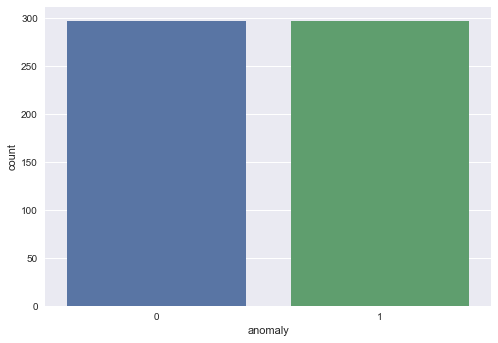

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
p = sns.countplot(data=df, x = 'anomaly')

In [22]:
fig = p.get_figure()
fig.savefig("fig.png")